
# Part I - (Ford GoBike System Data)
## by (Mohannad Islam)


## Introduction

Ford GoBike is the Bay Area's bike-sharing system. Bay Area Bike Share was launched in 2013 as a regional test program, with 700 bikes and 70 stations in San Francisco and San Jose. Once expanded, Ford GoBike will have 7,000 bikes throughout San Francisco, the East Bay, and San Jose.

Ford GoBike, like other bike share systems, comprises of a fleet of specifically constructed, sturdy, and durable bikes that are docked at a network of stations across the city. The bikes may be unlocked at one station and returned to any other in the system, making them perfect for one-way journeys. People utilize bike sharing to get to work or school, run errands, attend appointments or social gatherings, and more. It's a fun, easy, and economical way to go around.

## Preliminary Wrangling

In [67]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
import glob
import os
import datetime
import warnings 
warnings.filterwarnings('ignore')   


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [68]:
df = pd.read_csv(r'C:\Users\PC\Desktop\Code\Communicate Data Findings\project\201902-fordgobike-tripdata.csv')

In [69]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [70]:
# Sampling the data helps the analyst understand the required cleaning needed, and get a feel for the data
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
112934,624,2019-02-12 13:42:38.1570,2019-02-12 13:53:03.0440,121.0,Mission Playground,37.759210,-122.421339,102.0,Irwin St at 8th St,37.766883,-122.399579,2978,Subscriber,1989.0,Male,No
152125,1266,2019-02-06 16:12:25.1320,2019-02-06 16:33:31.2790,182.0,19th Street BART Station,37.809013,-122.268247,155.0,Emeryville Public Market,37.840521,-122.293528,2371,Subscriber,1993.0,Male,No
156006,467,2019-02-06 08:22:01.2360,2019-02-06 08:29:48.6600,24.0,Spear St at Folsom St,37.789677,-122.390428,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,5489,Subscriber,1981.0,Male,No
92936,368,2019-02-15 18:14:04.3910,2019-02-15 18:20:12.5580,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,1349,Subscriber,1996.0,Male,No
91548,2978,2019-02-16 04:59:56.5990,2019-02-16 05:49:35.3890,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3319,Customer,1993.0,Male,No
97580,407,2019-02-15 08:49:49.6360,2019-02-15 08:56:37.0990,210.0,45th St at Manila,37.833294,-122.256224,152.0,47th St at San Pablo Ave,37.835632,-122.281051,4508,Subscriber,1988.0,Female,No
128593,518,2019-02-10 12:53:52.6550,2019-02-10 13:02:31.5940,56.0,Koshland Park,37.773414,-122.427317,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5469,Subscriber,1981.0,Male,No
58305,254,2019-02-21 07:05:05.4880,2019-02-21 07:09:19.8930,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,66.0,3rd St at Townsend St,37.778742,-122.392741,5967,Subscriber,1989.0,Male,No
17295,877,2019-02-27 07:01:04.7270,2019-02-27 07:15:42.0330,350.0,8th St at Brannan St,37.771431,-122.405787,22.0,Howard St at Beale St,37.789756,-122.394643,3704,Subscriber,1987.0,Male,No
131308,2341,2019-02-09 12:50:30.4930,2019-02-09 13:29:31.5350,13.0,Commercial St at Montgomery St,37.794231,-122.402923,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,5418,Subscriber,NaN,NaN,No


In [71]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [72]:
df.shape

(183412, 16)

In [73]:
# Let's also get some additional description for stats figures
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [74]:

df.duplicated().sum()
# No duplicates here - that was straightforward

np.int64(0)

In [75]:

# let's check for missing values
df.isna().sum()
# It looks like some of the starting and ending values are NaN, along with member birth years and genders

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Observations:
Before assessing the data to draw conclusions, there are some quality issues (this dataset is tidy) that need to be cleaned :


- There are missing values throughout the dataset (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender)
- Start/end times are not in the timestamp format
- The following columns are not in object format:

    - start_station_id
    - end_station_id
    - bike_id

- Member birth is in the float format, but should be converted to integer format
- Member birthdates have a few inaccurate values

# Cleaning

First let's take a copy from our data frames to work on cleaning it.

In [76]:
# Preserve the original dataset and create a new copy for cleaning
df_cleaned = df.copy()
df_cleaned = df.copy()

- Define: Missing values - I will wait until later to clean these up. It may or may not pose a problem.


Code: N/A

Test: N/A


- Define: Converting several of the columns to the appropriate data type:
    - Starting and ending times to the timestamp format
    - User type, gender, and bike share for all to category format
    - Bike ID, start station ID, and end station ID to object format

Code: 

In [77]:
# Changing the format to datetime
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)

In [78]:
# Changing the user_type, member_gender, and bike_share_for_all_trip to category format
df_cleaned.user_type = df_cleaned.user_type.astype('category')
df_cleaned.member_gender = df_cleaned.member_gender.astype('category')
df_cleaned.bike_share_for_all_trip = df_cleaned.bike_share_for_all_trip.astype('category')

In [79]:
# Changing the bike_id, start_station_id, and end_station_id to object
df_cleaned.bike_id = df_cleaned.bike_id.astype(str)
df_cleaned.start_station_id = df_cleaned.start_station_id.astype(str)
df_cleaned.end_station_id = df_cleaned.end_station_id.astype(str)

Test:

In [80]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

- Define: Calculate the age of each member by subtracting their birth year from the current year (2025) and then clean up the format of the member age and birth year to integer.

Code:

In [81]:
# Subtracting the member_birth_year from the current year to get the ages of the members
df_cleaned['member_age'] = 2025 - df_cleaned['member_birth_year']

Test:

In [82]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,41.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,53.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,36.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,51.0


- Define: Clean up the ages of members - there are a few outliers that don't make sense. Since 99% of users are ages 70 and below, I will just keep that proportion of users by keeping users 66 and below

Code:

In [83]:
# The average age is 40 years old - that's a bit surprising
df_cleaned.member_age.mean()

np.float64(40.19356312126385)

In [84]:
df_cleaned.member_age.describe()
# So it looks like 75% of users are under the age of 45 and the oldest user is 147 years old

count    175147.000000
mean         40.193563
std          10.116689
min          24.000000
25%          33.000000
50%          38.000000
75%          45.000000
max         147.000000
Name: member_age, dtype: float64

In [85]:
df_cleaned.member_age.describe(percentiles = [.99])
# So it looks like 99% of users are under the age of 70

count    175147.000000
mean         40.193563
std          10.116689
min          24.000000
50%          38.000000
99%          70.000000
max         147.000000
Name: member_age, dtype: float64

In [86]:
# Only keep the events where riders were under 66 years of age
df_cleaned = df_cleaned.query('member_age <= 66')

In [87]:
# Convert the member_age and birth year to integer format
df_cleaned.member_age = df_cleaned.member_age.astype(int)
df_cleaned.member_birth_year = df_cleaned.member_birth_year.astype(int)

Test:

In [88]:
df_cleaned.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
7665,772,2019-02-28 08:49:13.551,2019-02-28 09:02:06.179,39.0,Scott St at Golden Gate Ave,37.778999,-122.436861,349.0,Howard St at Mary St,37.781010,-122.405666,5496,Customer,1980,Male,No,45
111157,1135,2019-02-12 17:10:03.324,2019-02-12 17:28:59.280,22.0,Howard St at Beale St,37.789756,-122.394643,126.0,Esprit Park,37.761634,-122.390648,3640,Subscriber,1992,Female,No,33
127217,872,2019-02-10 16:21:13.666,2019-02-10 16:35:45.842,315.0,Market St at 45th St,37.834174,-122.272968,274.0,Oregon St at Adeline St,37.857567,-122.267558,5254,Subscriber,1990,Male,No,35
99799,464,2019-02-14 19:07:50.417,2019-02-14 19:15:35.255,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,92.0,Mission Bay Kids Park,37.772301,-122.393028,5351,Subscriber,1987,Male,No,38
179165,259,2019-02-01 15:10:22.319,2019-02-01 15:14:41.455,129.0,Harrison St at 20th St,37.758862,-122.412544,88.0,11th St at Bryant St,37.770030,-122.411726,5468,Subscriber,1981,Female,No,44


In [89]:
df_cleaned.member_age.describe()

count    171617.000000
mean         39.520782
std           8.953751
min          24.000000
25%          33.000000
50%          38.000000
75%          44.000000
max          66.000000
Name: member_age, dtype: float64

- Define: Add columns for the start month, day of the week, and hour, along with figuring out the trip duration in minutes so I can create visuals based on workable units.

Code:

In [90]:
# Start time month (January - December)
df_cleaned['start_time_month'] = df_cleaned['start_time'].dt.strftime('%B')

In [91]:
# Start time month (1-12)
df_cleaned['start_time_month_num'] = df_cleaned['start_time'].dt.month.astype(int)

In [92]:
# Start time weekday
df_cleaned['start_time_weekday'] = df_cleaned['start_time'].dt.strftime('%a')

In [93]:
# Start and end time hour
df_cleaned['start_time_hour'] = df_cleaned['start_time'].dt.hour
df_cleaned['end_time_hour'] = df_cleaned['end_time'].dt.hour

In [94]:
# Duration in seconds to duration in minutes
df_cleaned['duration_min'] = df_cleaned['duration_sec']/60
df_cleaned['duration_min'] = df_cleaned['duration_min'].astype(int)

Test:

In [95]:
df_cleaned.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min
99575,353,2019-02-14 19:39:01.927,2019-02-14 19:44:55.551,49.0,S Park St at 3rd St,37.780760,-122.394989,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1990,Male,No,35,February,2,Thu,19,19,5
102917,223,2019-02-14 15:29:31.534,2019-02-14 15:33:14.924,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,41.0,Golden Gate Ave at Polk St,37.781270,...,1982,Female,No,43,February,2,Thu,15,15,3
105787,220,2019-02-13 20:57:01.009,2019-02-13 21:00:41.583,53.0,Grove St at Divisadero,37.775946,-122.437777,31.0,Raymond Kimbell Playground,37.783813,...,1984,Male,No,41,February,2,Wed,20,21,3
77373,648,2019-02-19 07:11:44.930,2019-02-19 07:22:33.166,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,1986,Male,No,39,February,2,Tue,7,7,10
139621,476,2019-02-07 20:43:32.775,2019-02-07 20:51:29.259,223.0,16th St Mission BART Station 2,37.764765,-122.420091,118.0,Eureka Valley Recreation Center,37.759177,...,1993,Male,No,32,February,2,Thu,20,20,7


In [96]:
# df_cleaned.query("start_time_month == 'April'")
df_cleaned.start_time_month_num.duplicated().sum()

np.int64(171616)

In [97]:
### All the data are from February, so I will drop the month columns
# df_cleaned.drop(['start_time_month', 'start_time_month_num'], axis=1, inplace=True)

- Define: Calculate the total distance traveled using the latitude and longitude in the data set

Code:

In [98]:
import math

def calculate_distance(coord1, coord2):
    lat_a, lon_a = coord1
    lat_b, lon_b = coord2
    earth_radius = 6371  # Earth's radius in km

    delta_lat = math.radians(lat_b - lat_a)
    delta_lon = math.radians(lon_b - lon_a)

    haversine = (math.sin(delta_lat / 2) ** 2 + 
                 math.cos(math.radians(lat_a)) * math.cos(math.radians(lat_b)) * 
                 math.sin(delta_lon / 2) ** 2)

    central_angle = 2 * math.atan2(math.sqrt(haversine), math.sqrt(1 - haversine))
    distance_km = earth_radius * central_angle

    return distance_km

In [99]:
# Using the calcuated math on our columns for lat and long
df_cleaned['distance_km'] = df_cleaned.apply(lambda x: calculate_distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [100]:
df_cleaned.head(5)
# The distance in km is calculated

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,41,February,2,Thu,17,8,869,0.544709
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,53,February,2,Thu,12,5,1030,2.704545
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,36,February,2,Thu,17,4,608,0.260739
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,51,February,2,Thu,23,0,26,2.409301
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,66,February,2,Thu,23,0,29,3.332203


In [101]:
# df_cleaned.start_time_month.describe()

    Save the cleaned data set to a new file

In [102]:
df_cleaned.to_csv('fordgo_master_clean.csv', index = False)

### What is the structure of your dataset?

The FordGoBike data is basic and easy to interpret. This data was acquired efficiently, resulting in a rich set of data to work with and draw conclusions from.

- Trip Duration (seconds)
    - Start Time and Date
    - End Time and Date
- Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
- End Station ID
    End Station Name
    End Station Latitude
    End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
    - Member Year of Birth
    - Member Gender
- Member Age
- Start Time Month
- Start Time Month Number
- Start Time Day of the Week
- Start Time Hour
- Distance (km)


### What is/are the main feature(s) of interest in your dataset?

The key features include data about the start and end of a ride.  This can be used to determine whether bicycles are in high or low demand.  There is also a wealth of information available about the bike service's users, such as their age, gender, and whether they are paid members or casual users.  These qualities might help businesses decide which age groups to target in marketing campaigns or which days of the week to make bikes available.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The start and end times, as well as other time-related information, will be actively utilized. I will leverage consumer data as well as distance to better understand the user-driven data behind each ride.

## Univariate Exploration



In this part, I analyze the distributions of individual variables. This is also in preparation to investigate the correlations between variables.

1- What are the most popular days for using the bike sharing system?

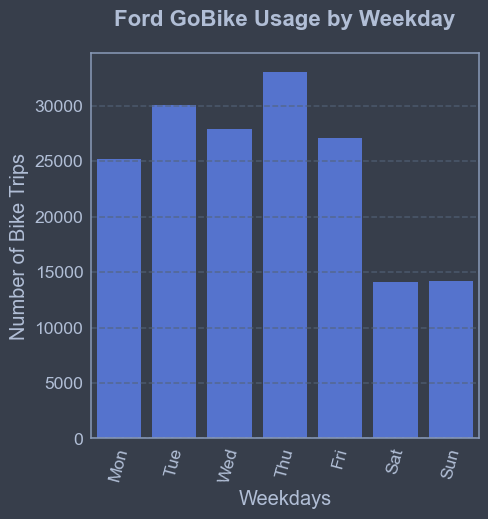

In [103]:
# Weekday usage of the Ford Go bike system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df_cleaned, x='start_time_weekday', order=weekday, color="royalblue")

plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips')
plt.title('Ford GoBike Usage by Weekday', fontsize=16, fontweight='bold', y=1.05)

plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Insights:
    - The highest number of trips occurs on Thursday, followed by Tuesday and Wednesday.
    - This suggests commuters heavily use the service during weekdays, likely for work or school.
    - Lower Usage on Weekends (Saturday & Sunday)

2- What are the peak hours for Ford GoBike usage, and what does this tell us about user behavior?

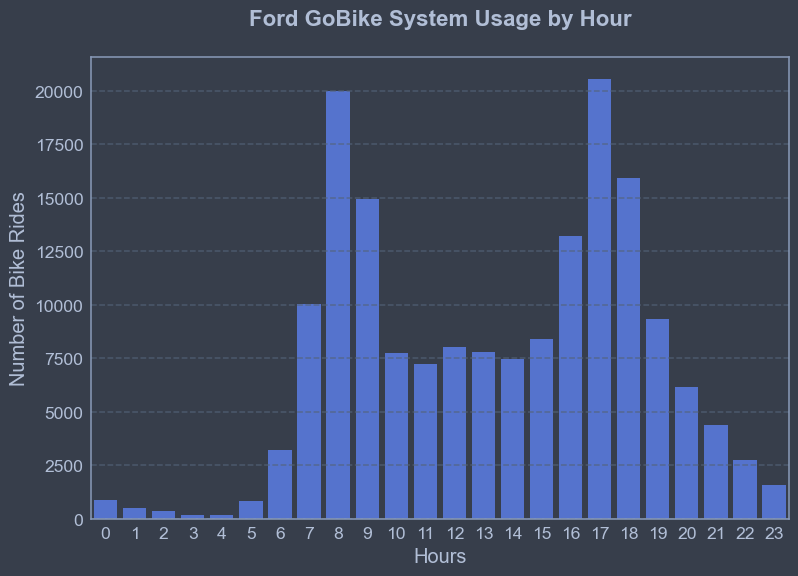

In [104]:
# Hourly usage of the Ford Go Bike System
plt.figure(figsize=(9, 6))
ax = sns.countplot(data=df_cleaned, x='start_time_hour', color="royalblue")

plt.xlabel('Hours')
plt.ylabel('Number of Bike Rides')
plt.title('Ford GoBike System Usage by Hour', fontsize=16, fontweight='bold', y=1.05)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Insights:
    - The highest usage is around 8 AM and 5 PM, indicating commuters use the service for work/school travel.
    - Midnight to 5 AM has minimal activity, suggesting that bike-sharing is rarely used overnight.

3- How long do most Ford GoBike trips last?

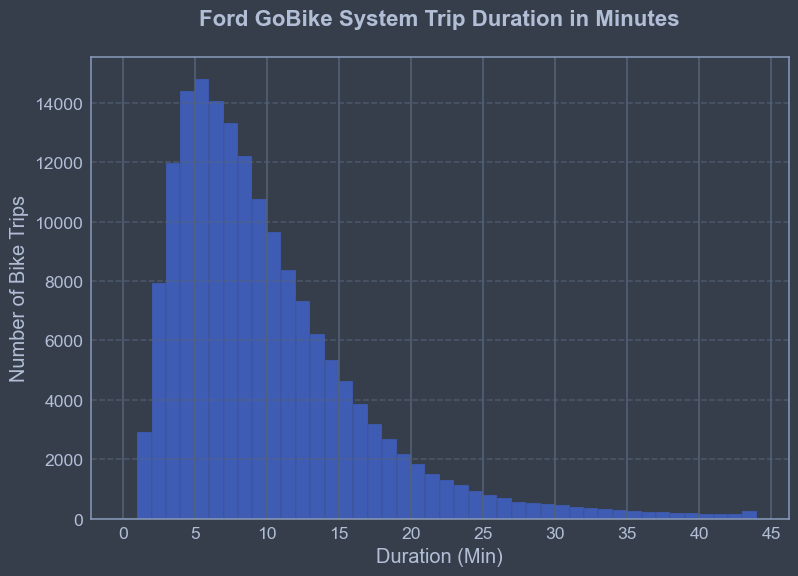

In [105]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = np.arange(0, 50, 5)

plt.figure(figsize=(9, 6))
sns.histplot(data=df_cleaned, x='duration_min', bins=bin_edges, color='royalblue', alpha=0.7)

plt.title("Ford GoBike System Trip Duration in Minutes", fontsize=16, fontweight='bold', y=1.05)
plt.xlabel("Duration (Min)")
plt.ylabel("Number of Bike Trips")

plt.xticks(ticks)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Insights:
    - The highest number of trips fall between 5 to 10 minutes, with a sharp peak around 7 minutes.
    - As trip duration increases beyond 15 minutes, the number of trips declines significantly.
    - If the bike-sharing system charges per duration, users might aim to stay within a lower-cost bracket, explaining why most trips are short.

4- What is the age distribution of Ford GoBike users

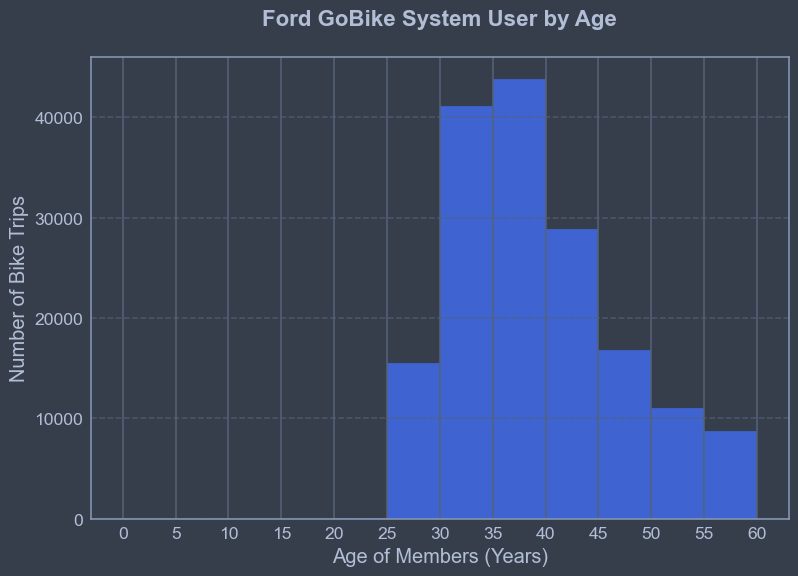

In [106]:
# Age group data
bin_edges = np.arange(0, 65, 5)

plt.figure(figsize=(9, 6))
sns.histplot(data=df_cleaned, x='member_age', bins=bin_edges, color='royalblue', alpha=0.9)

plt.title("Ford GoBike System User by Age", fontsize=16, fontweight='bold', y=1.05)
plt.xlabel("Age of Members (Years)")
plt.ylabel("Number of Bike Trips")

plt.xticks(bin_edges)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Insights:
    - The highest number of users falls within the 30 to 40-year-old range.
    - The number of bike trips decreases significantly for users above 50 years old.
    - here are very few users below 25 years old.

5- What is the distribution of trip distances in the Ford GoBike system?

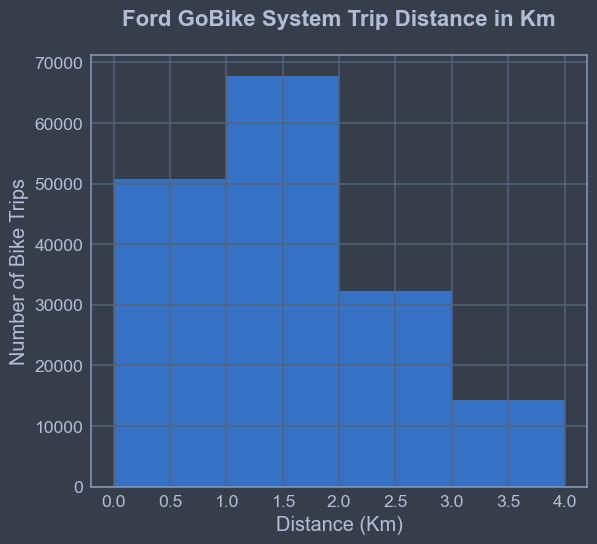

In [107]:

# Distance in km traveled
bin_edges = np.arange(0, 5, 1)

plt.hist(data = df_cleaned, x = 'distance_km', bins = bin_edges);

plt.title("Ford GoBike System Trip Distance in Km", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (Km)')
plt.ylabel('Number of Bike Trips');

### Insights:
    - The highest number of bike trips falls within the 1 to 2 km range, making it the most common trip distance.
    - the number of bike trips drops significantly beyond 3 km.
    - Most trips are clustered in the 0.5 to 1.5 km range, which could be ideal for optimizing station placements and ensuring efficient coverage.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Fortunately, due to extensive cleaning efforts, there were no major surprises throughout the exploration and visualization phases. The duration and distance of the bike ride caused me some concern because there were some unexpected outliers.Furthermore, the duration is only one month (February).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Nothing looks out of the ordinary for a major city's bike sharing system.  So far, records show that individuals of typical working age are the system's principal users, and they ride the bikes for their everyday travels.

## Bivariate Exploration


In this section, I look at the associations between pairs of variables in the data.

1- What is the gender distribution of Ford GoBike riders?

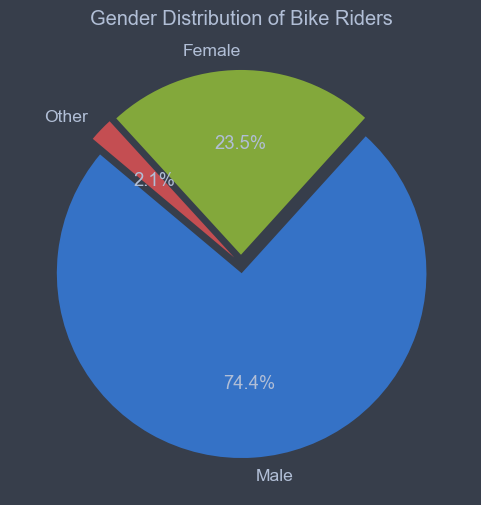

In [108]:
gender_counts = df_cleaned['member_gender'].value_counts()

# Define colors and explode settings
# colors = ['lightblue', 'lightcoral', 'lightgreen']
explode = (0.05, 0.05, 0.05) 

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',  explode=explode, startangle=140)
plt.title('Gender Distribution of Bike Riders')
plt.show()

### Insights:
    - 74.4% of bike riders are male, indicating a significant gender gap in bike-sharing system usage.
    - Female riders make up 23.5%
    - 'Other' may occur because :
        Some users may choose not to disclose their gender.
        If someone forgot, skipped, or didn’t select a gender when signing up, the data might be categorized under "Other".

2- What is the distribution of Ford GoBike users between customers and subscribers?

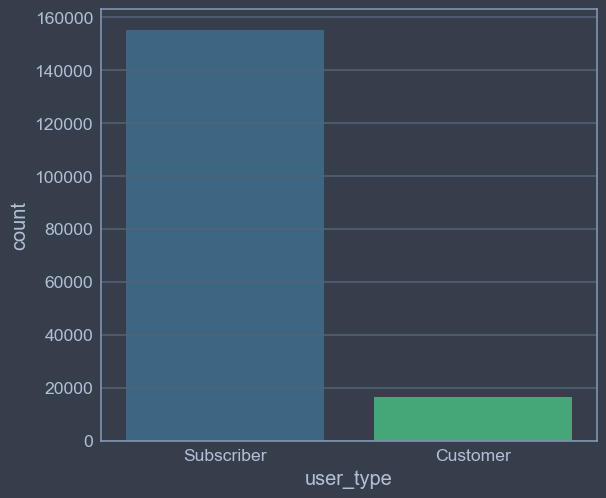

In [109]:
sns.countplot(x='user_type', data=df_cleaned, palette='viridis', order=df_cleaned.user_type.value_counts().index);

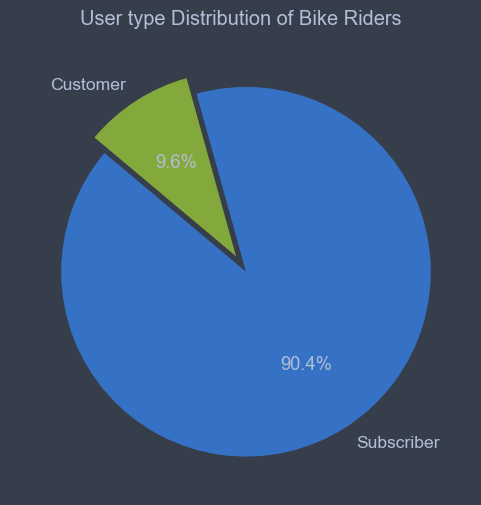

In [110]:
user_type_counts = df_cleaned['user_type'].value_counts()

# Define colors and explode settings
# colors = ['lightblue', 'lightcoral', 'lightgreen']
explode = (0.05, 0.05)  # Slightly separate slices for emphasis

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%',  explode=explode, startangle=140)
plt.title('User type Distribution of Bike Riders')
plt.show()


### Insights:
    - a significantly higher number of bike trips are made by subscribers compared to customers.
    - The high count of subscriber trips implies that the GoBike system benefits from recurring users rather than one-time rides.

3- How does trip duration vary with distance in the Ford GoBike system?

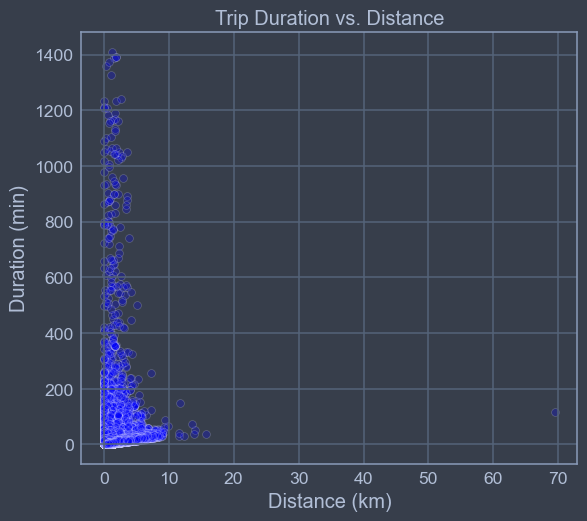

In [111]:
sns.scatterplot(x='distance_km', y='duration_min', data=df_cleaned, alpha=0.25, color='blue', marker='o')
plt.title('Trip Duration vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Duration (min)')
plt.show()

### Insights:
    - The majority of trips are clustered around distances less than 10 km and durations under 200 minutes.
    - Some trips last over 1000 minutes but cover very short distances, which could indicate bike usage for purposes other than transportation
    - There are some trips covering unusually high distances (above 50 km) or lasting over 1000 minutes, which might be due to system errors or exceptional cases of bike usage.(Outliers)

4- How do bike usage trends vary between subscribers and customers throughout the week?

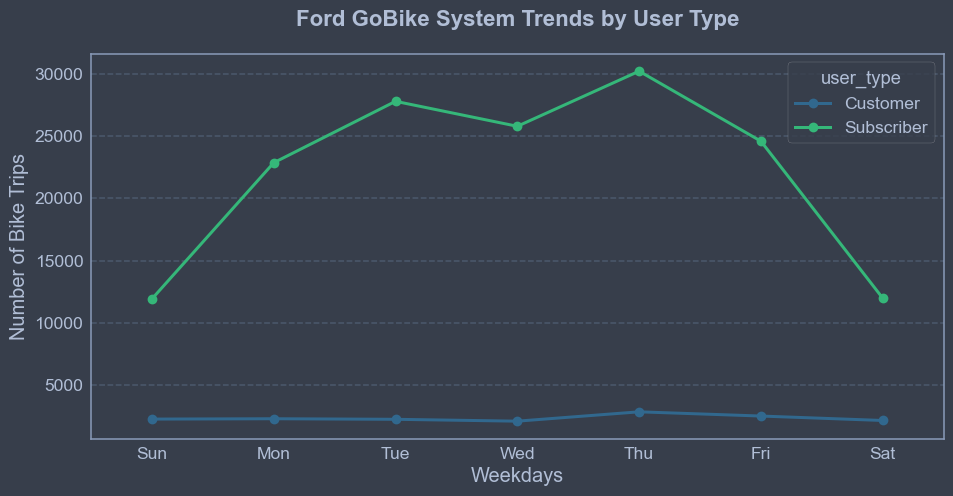

In [112]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(11, 5))

df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index(name='trip_count')
weekday = ['Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

sns.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y='trip_count', hue='user_type', 
              order=weekday, palette='viridis', markers='o', linestyles='-')

plt.title('Ford GoBike System Trends by User Type', fontsize=16, fontweight='bold', y=1.05)
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Insights:
    - The number of bike trips from subscribers is significantly higher than from customers on all days of the week.
    - Bike usage among subscribers drops significantly on Saturday and remains low on Sunday, indicating lower work-related demand.
    - Unlike subscribers, customers show relatively steady usage throughout the week, with only minor fluctuations.

5- How does the average distance traveled differ between subscribers and customers in the Ford GoBike system?

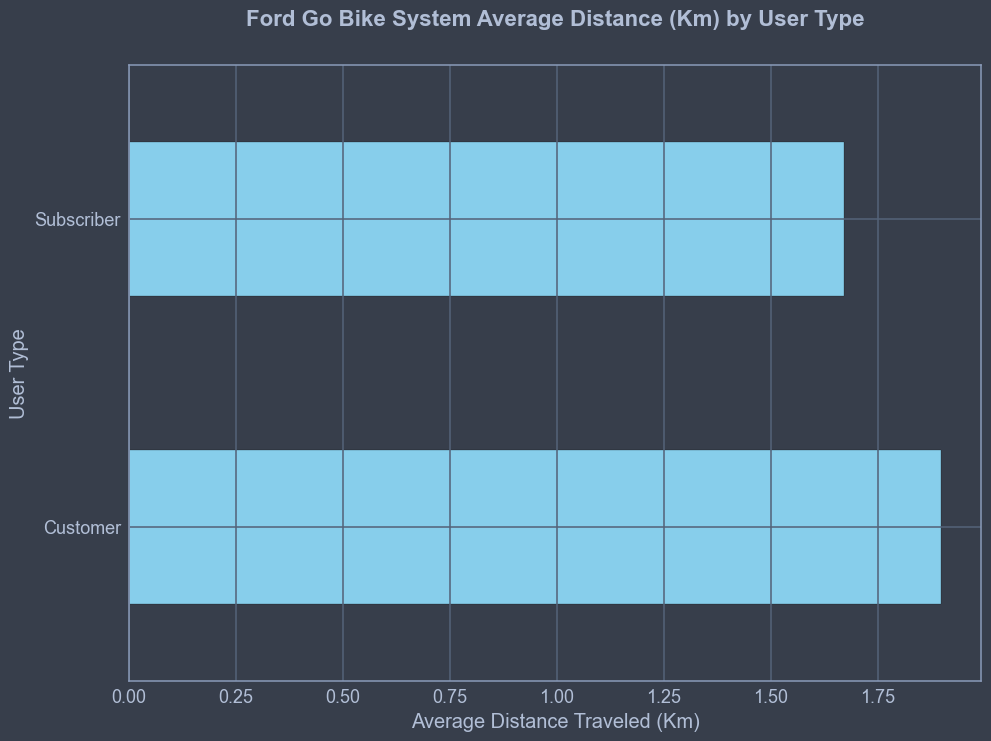

In [113]:
# Customer Usage by Distance vs. Subscriber Usage by Distance
plt = df_cleaned.groupby('user_type')['distance_km'].mean().plot(kind='barh', figsize=(11,8), color='skyblue', edgecolor='black', fontsize=13);

plt.set_title('Ford Go Bike System Average Distance (Km) by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.set_ylabel('User Type')
plt.set_xlabel('Average Distance Traveled (Km)');

### Insights:
    - The average distance traveled by customers is higher than that of subscribers.
    - Since subscribers likely use the service for daily commuting, their trips are generally shorter and more consistent.

6- How do ride durations compare between customers and subscribers in the Ford GoBike system?

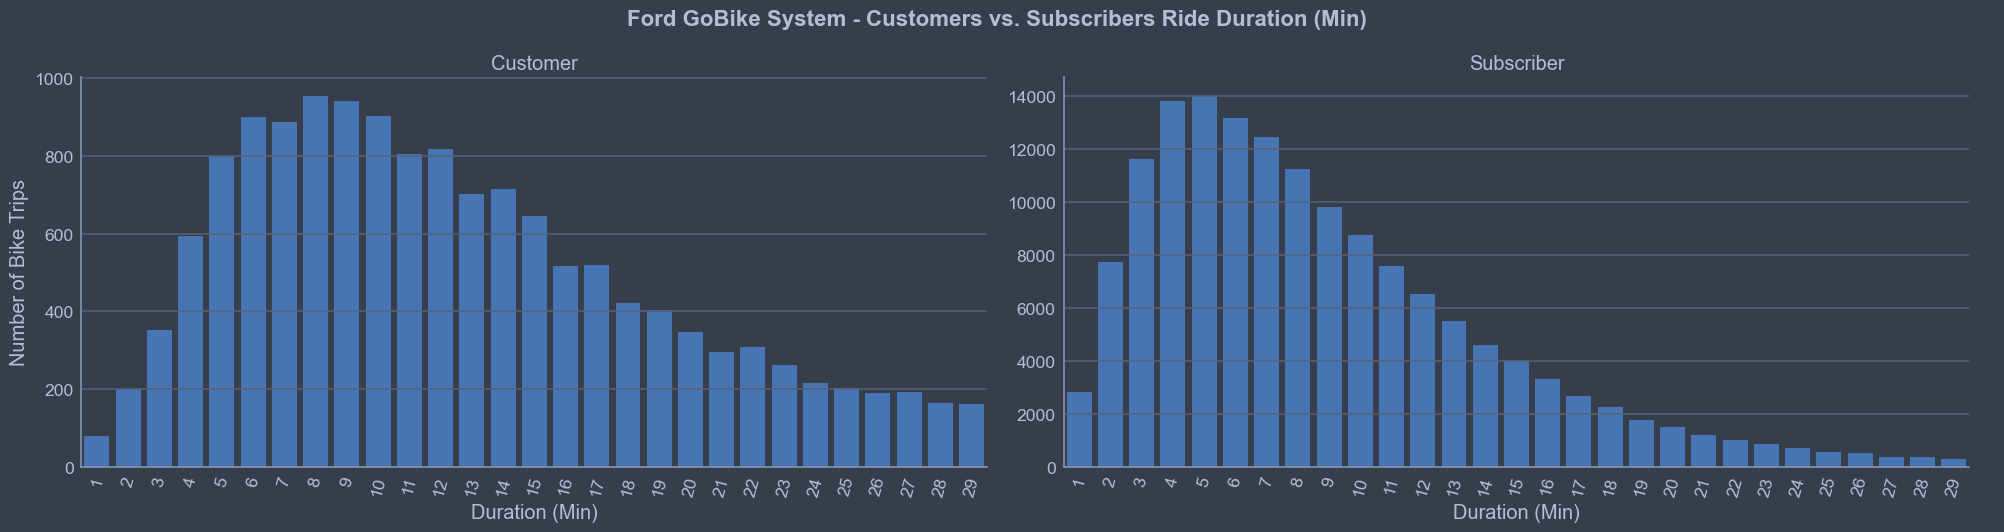

In [114]:
# Customer Usage by Duration vs. Subscriber Usage by Duration

data = df_cleaned.query('duration_min < 30')

graph = sns.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False,  height=5, aspect=2);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

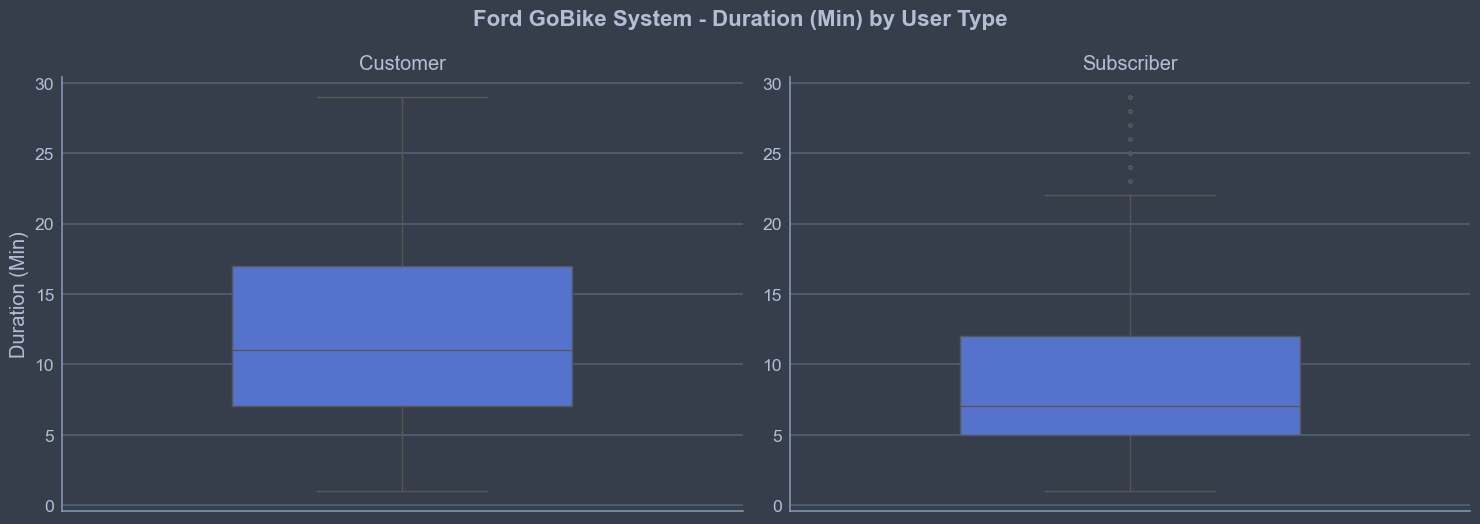

In [117]:


data = df_cleaned[df_cleaned['duration_min'] < 30]  

g = sns.FacetGrid(data, col="user_type", height=5, aspect=1.5, sharey=False)

g.map_dataframe(sns.boxplot, y="duration_min", color="royalblue", width=0.5, fliersize=2)  

g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford GoBike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold')

plt.show()

### Insights:
    - The number of trips taken by subscribers is much greater than that of customers.
    - Both groups peak at around 5-10 minutes, indicating that the majority of trips are brief.
    - Customers take slightly longer rides on average.
    - The median of the Subscriber (boxplot) is around 6-7 minutes , while in Customer is around 11-12 minutes.

7- What is the relationship between age and trip duration in the Ford GoBike system?

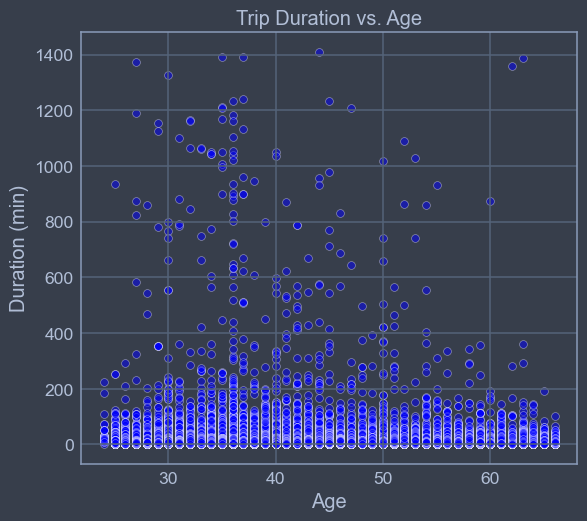

In [ ]:
sns.scatterplot(x='member_age', y='duration_min', data=df_cleaned, alpha=0.5, color='blue')
plt.title('Trip Duration vs. Age')
plt.xlabel('Age') 
plt.ylabel('Duration (min)')
plt.show()

### Insights:    
    - Most trips are short, regardless of age
    - Some riders, particularly in the 30–50 age range, have extreme trip durations exceeding 1000 minutes. These could be errors, long leisure rides, or - - forgotten bike returns.(Outliers)
    - Younger users (20s–40s) tend to have a wider spread of trip durations compared to older riders.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Adding the user type to the analysis revealed different behavior usage between customers and subscribers. The data suggests that customers are casual riders such as tourists, or students on a school vacation or holiday. This is accurate when factoring in that Customer usage increases on the weekends. In contrast, the data suggests Subscribers are daily commuters or full time students who use the system during weekdays, better weather, and mostly for shorter distances. They mainly rent bikes before and after a typical work or school day (8-9am and 5-6pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends, which may be for longer trips around the surrounding area. Subscribers use the system mainly for commute purposes so they prefer quick, short rides to and from work.

## Multivariate Exploration

In this part, I plotted three or more variables to further explore the Ford Go Bike data.

1- How does bike usage vary by gender and user type across different days of the week?

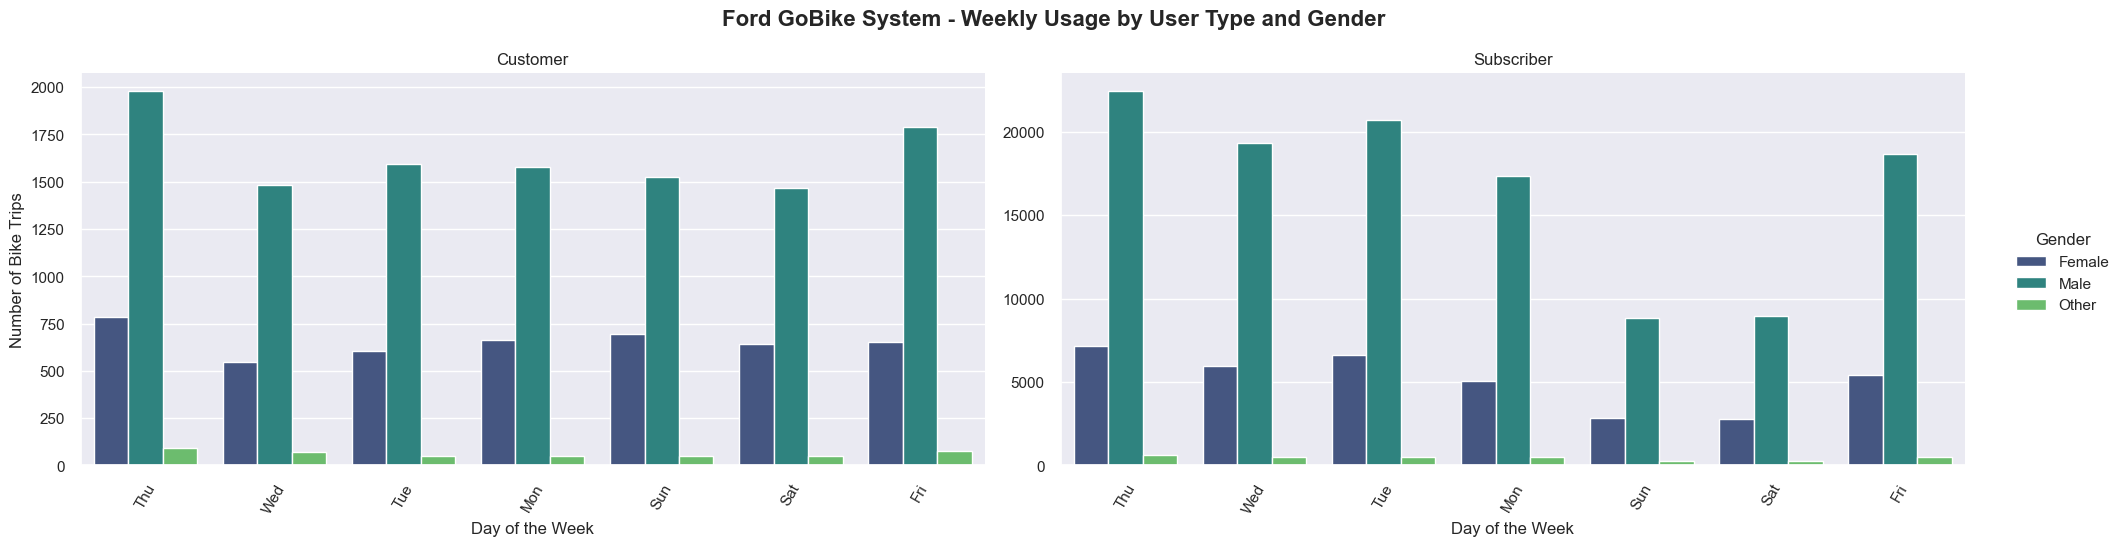

In [ ]:

graph = sns.catplot(
    data=df_cleaned, 
    x='start_time_weekday', 
    col="user_type", 
    hue="member_gender", 
    kind='count', 
    sharey=False, 
    height=5, 
    aspect=2,
    palette="viridis"
)

graph.set_axis_labels("Day of the Week", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")
graph.fig.suptitle('Ford GoBike System - Weekly Usage by User Type and Gender', y=1.05, fontsize=16, fontweight='bold')
graph.set_xticklabels(rotation=60)


### Insights:     
    - Across both customer and subscriber categories, male riders (green bars) significantly outnumber female.
    - Subscriber usage dips on Saturday and Sunday, suggesting that most subscribers use the bikes for commuting. However, customer usage remains relatively stable across the week, indicating more leisure or non-commuting trips.

2- How does trip duration vary with distance, considering gender and age?

<Figure size 1000x600 with 0 Axes>

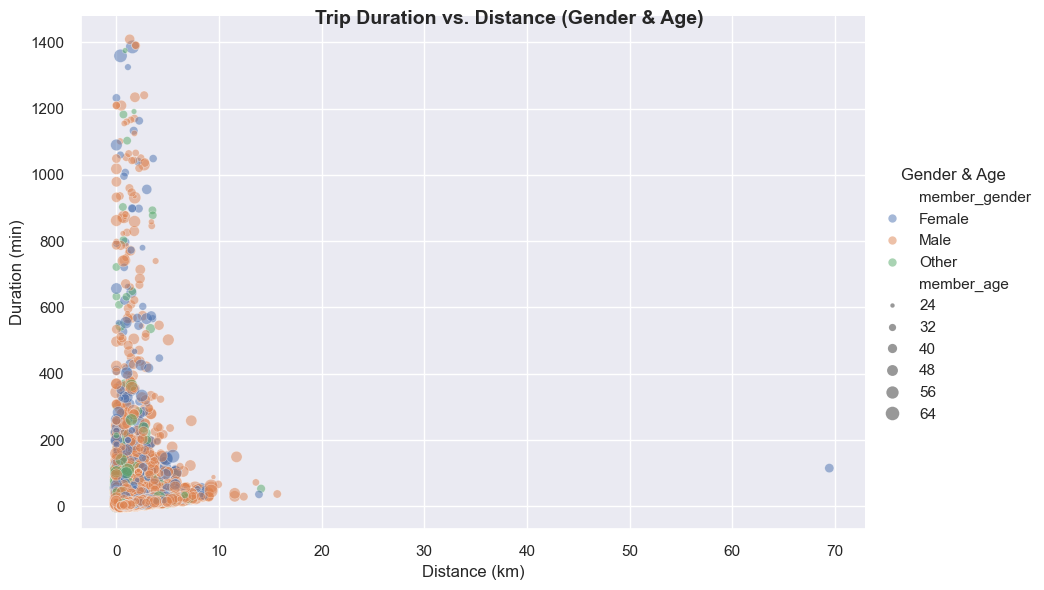

In [ ]:

plt.figure(figsize=(10, 6))
scatter = sns.relplot(
    data=df_cleaned, 
    x='distance_km', 
    y='duration_min', 
    hue='member_gender', 
    size='member_age', 
    alpha=0.5,
    sizes=(10, 100),  
    height=6, 
    aspect=1.5
)

scatter.set_axis_labels('Distance (km)', 'Duration (min)')
scatter._legend.set_title('Gender & Age')
scatter.fig.suptitle('Trip Duration vs. Distance (Gender & Age)', fontsize=14, fontweight='bold')

plt.show()

### Insights:
    - The majority of trips are clustered below 10 km and 200 minutes, suggesting that users mostly take short rides.
    - A few extreme outliers exceed 50 km and 1000+ minutes, indicating rare long-distance or extended-duration rides.
    - Inverse correlation pattern:
        As distance increases, the duration remains relatively controlled, meaning longer trips are more efficient (likely taken at a steady pace).
        However, for very short trips, duration varies widely, possibly due to pauses, slow speeds, or different trip purposes.
    - Riders of different age groups seem evenly distributed, meaning age does not play a major role in trip efficiency.    

3- How does trip duration vary by user type and gender?

Text(0.5, 1.05, 'Ford GoBike System - Trip Duration (Min) Per User Type and Gender')

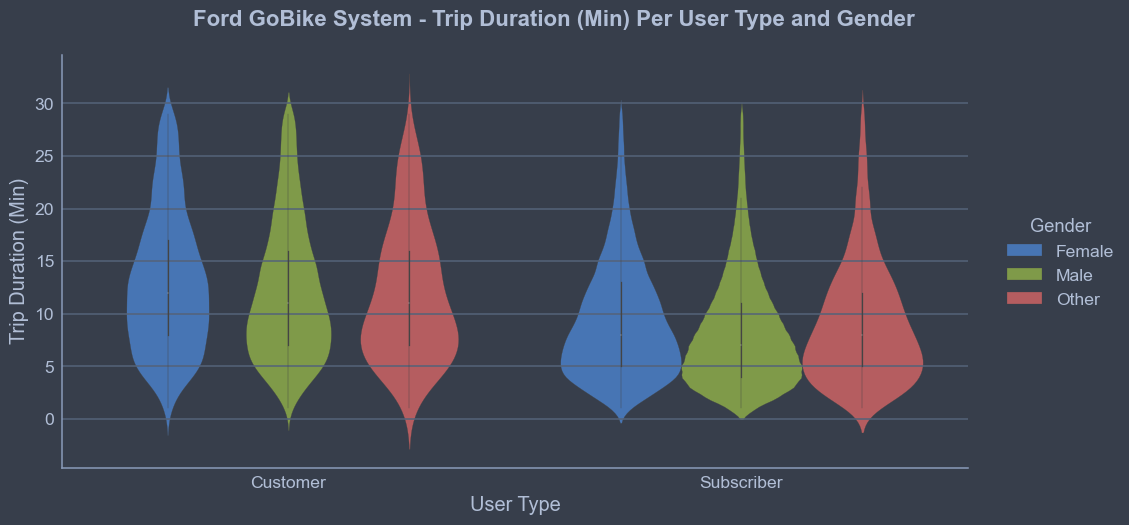

In [ ]:
# Violinplot - duration (min) per user type and gender

graph = sns.catplot(data=data, x='user_type', y="duration_min", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ford GoBike System - Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold')

### Insights: 
    - Customers ride for longer durations, possibly for leisure.
    - Subscribers take shorter, more regular trips, likely for work commutes.
    - Males take shorter and more frequent trips, and female users are more variable.

4- How are numerical features correlated in the dataset?

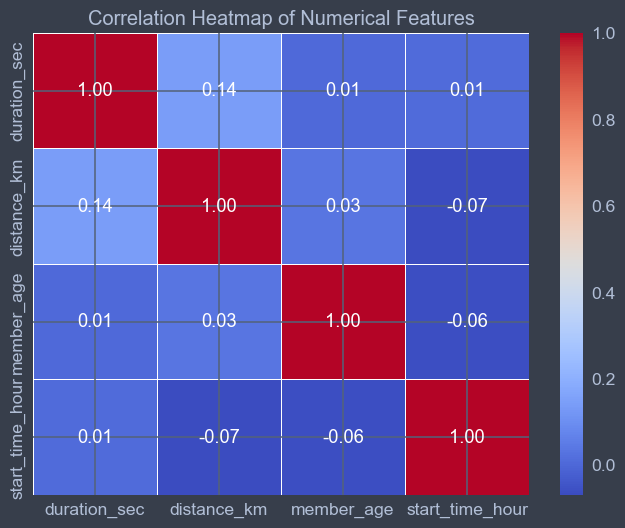

In [ ]:
# Compute the correlation matrix
corr_matrix = df_cleaned[['duration_sec', 'distance_km', 'member_age', 'start_time_hour']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Insights: 
    - The correlation between duration_sec and distance_km is 0.14, which is low.
    - Some short trips may cover long distances (e.g., fast riders), and some long trips may cover short distances (e.g., casual riders).
    - Member age has very weak correlations (close to 0) with duration, distance, and start time,
    this suggests that age is not a strong factor in determining how long or far people ride.
    - start_time_hour has a weak negative correlation with distance (-0.07) and member age (-0.06),
    and this means that trip distance or age doesn’t strongly affect the time at which people ride.

5- How does trip duration vary by user type and gender? (by Facet Plot)

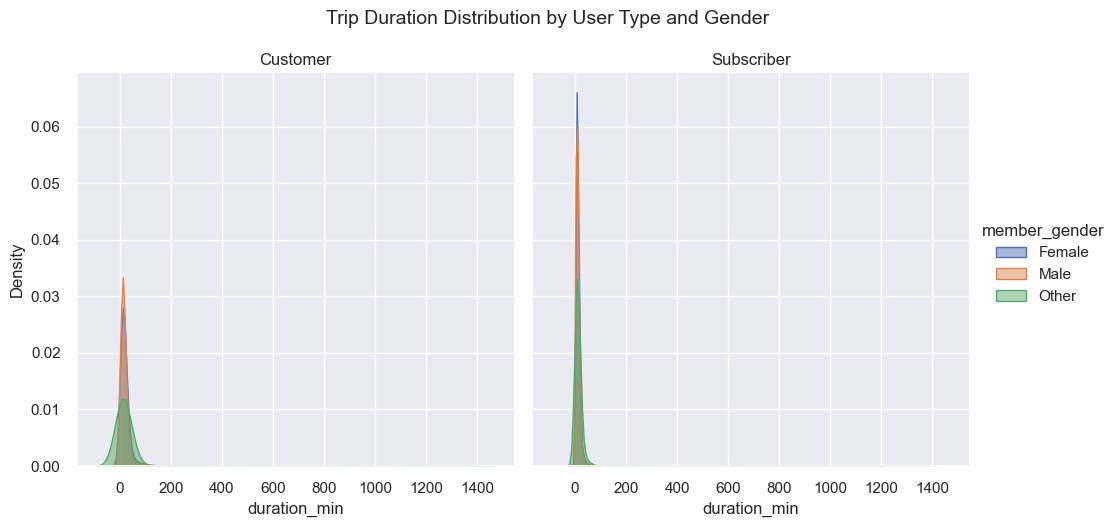

In [ ]:
# Facet Plot: Trip Duration by User Type and Gender
sns.set(style="darkgrid")
g = sns.FacetGrid(df_cleaned, col="user_type", hue="member_gender", height=5, aspect=1)
g.map(sns.kdeplot, "duration_min", fill=True, alpha=0.5)
g.add_legend()
g.set_titles(col_template="{col_name}")
plt.suptitle("Trip Duration Distribution by User Type and Gender", y=1.05, fontsize=14)
plt.show()

### Insights:
    - Customers and subscribers have brief trip lengths, with the majority of rides less than 50 minutes.
    - Male riders appear to have a relatively longer trip length than female and other gender groups.
    - Subscribers take more frequent, shorter journeys, while customers take a more dispersed journey duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

User type has the highest predictive power of trip length (customers take shorter trips than subscribers).
Distance and duration are not highly correlated with one another, suggesting that there are various riding behaviors.
Sex and age do not affect trip behavior much, thus they are weaker predictors of trip behavior.
The numerical property intercorrelations are low, i.e., bike use depends more on class of user and destination of the trip than on sheer numerical dependence.

### Were there any interesting or surprising interactions between features?

Trip duration vs. travel distance was poorly correlated—many long trips had short distances, suggesting recreational rides.
Customers traveled further than subscribers, likely taking the service as a way of relaxation and not for commuting.
Age and gender played minimal roles in trip patterns, in that riding behavior was fairly consistent between groups.

## Conclusions
> Summary of Main Findings
1. Trip Length & Distance: Most of the trips involved short distances, but trip length was extremely variable, implying mixed usage modes (commuting vs. leisure).
2. User Type Impact: Subscribers took shorter journeys compared to customers, suggesting that they use the service for commuting more and customers likely use it for leisure purposes.
3. Gender & Age Trends: No substantial impact of gender or age on trip behavior, i.e., riding habits were fairly uniform across populations.
4. Correlation Observations: Quantitative characteristics showed weak correlations with diverse trip patterns with no notable interdependencies.

> Reflection on Data Exploration Steps
- Conducted univariate, bivariate, and multivariate analysis to analyze patterns.
- Employed visualizations (violin plots, scatter plots, heatmaps) to discover trends and relationships.
- Determined expected results (subscribers have shorter trips) but also some surprises (very little relation between trip length and distance).
